In [1]:
import pandas as pd

df = pd.read_csv("online_retail.csv", encoding='ISO-8859-1')

In [2]:
df.head()
df.shape
df.columns
df.info()
df.isnull().sum()
df.duplicated().sum() #Duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


5268

In [3]:
df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom


In [4]:
df[df['InvoiceNo'].str.startswith('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.dropna(subset=['CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df = df.reset_index(drop=True)
print("Cleaned Data:")
print(df.info())
print(df.head())


Cleaned Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.3+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B  

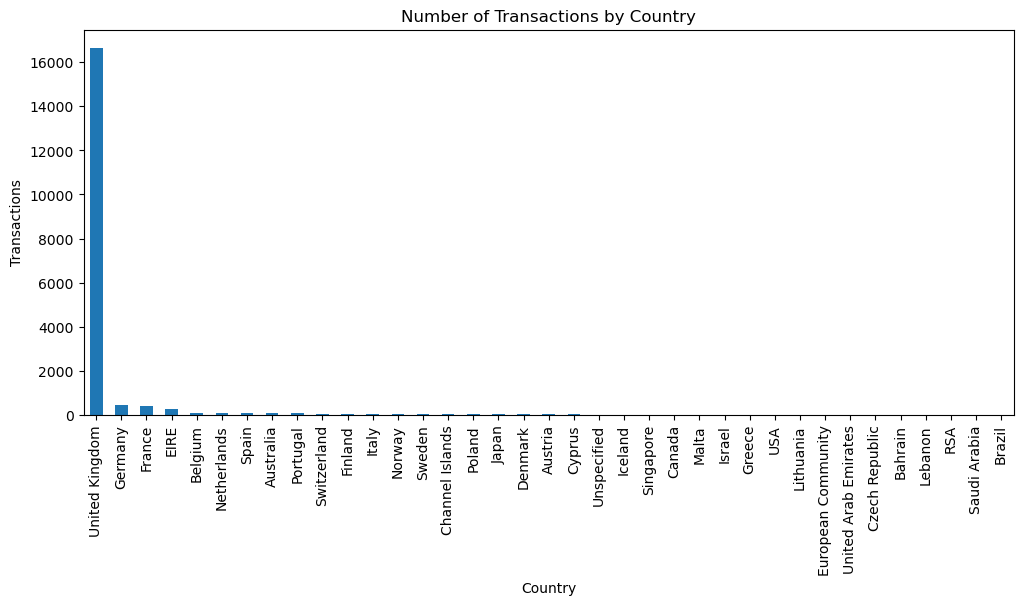

C:\Users\Evangeline T\AppData\Local\Temp\ipykernel_18220\3300496140.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


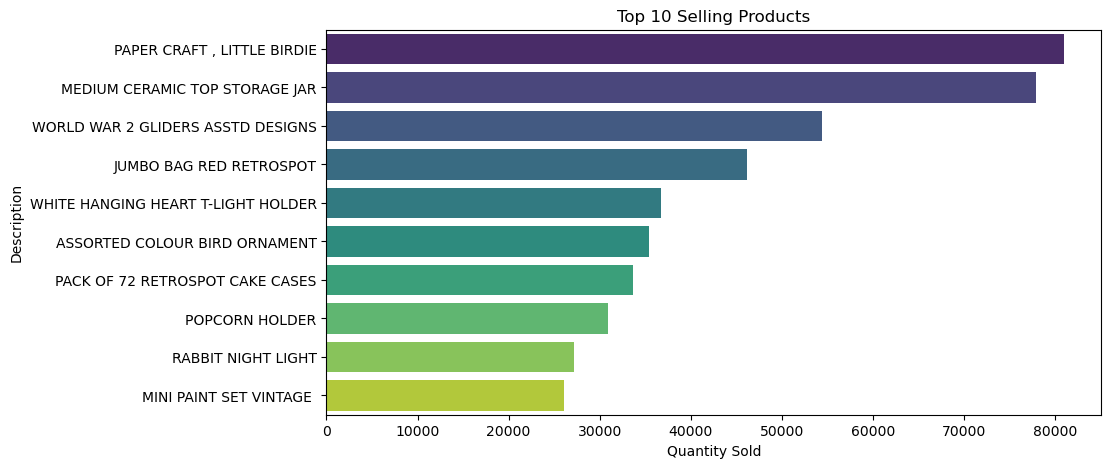

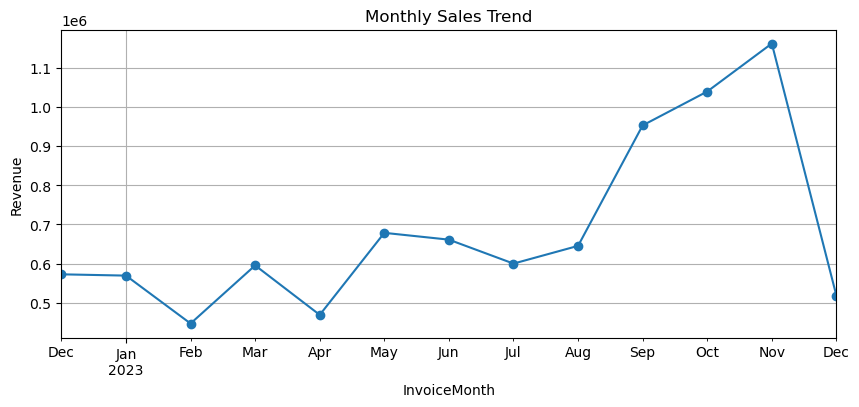

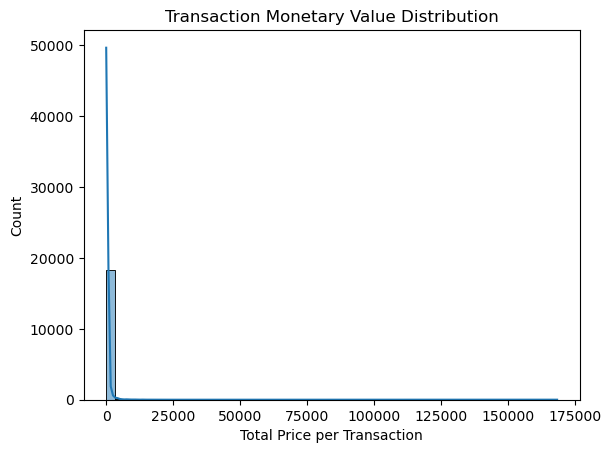

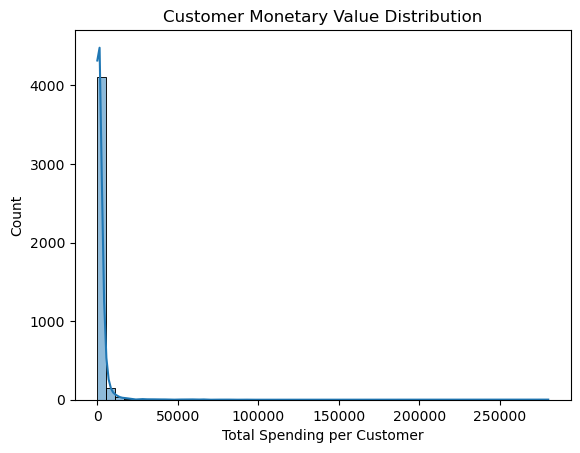

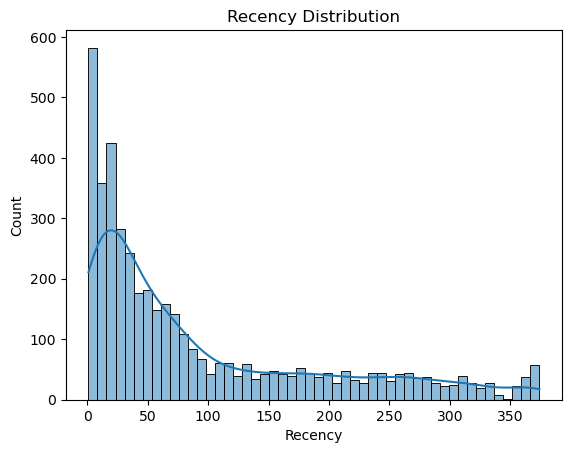

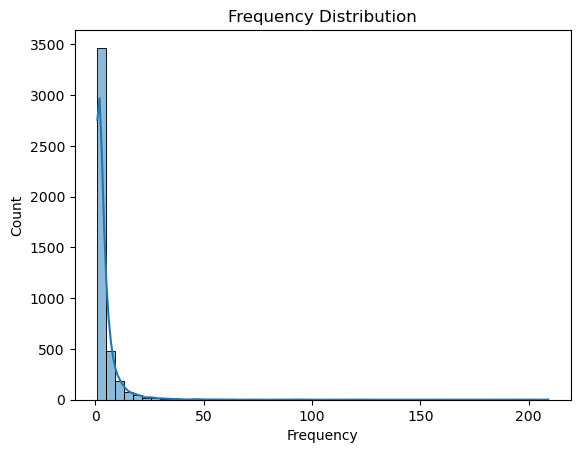

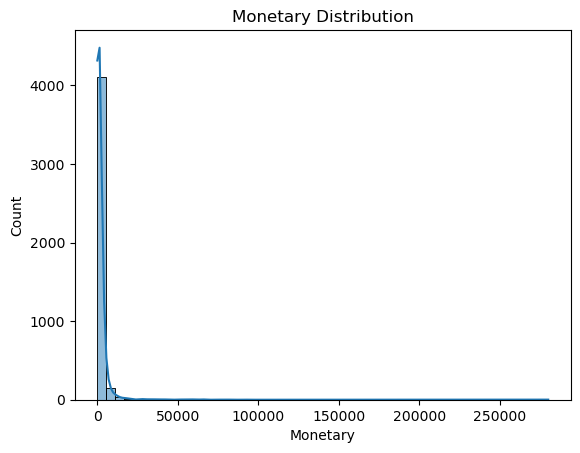

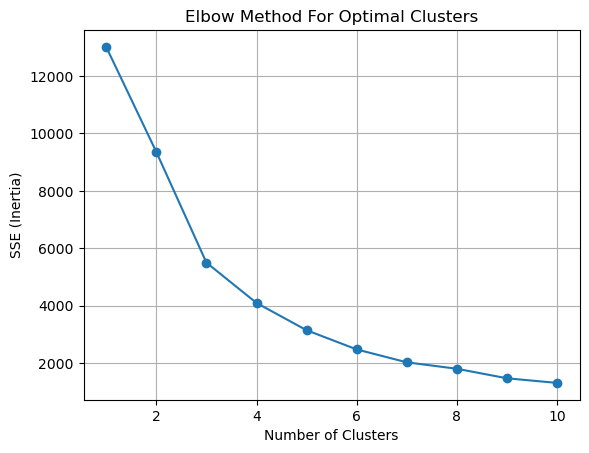

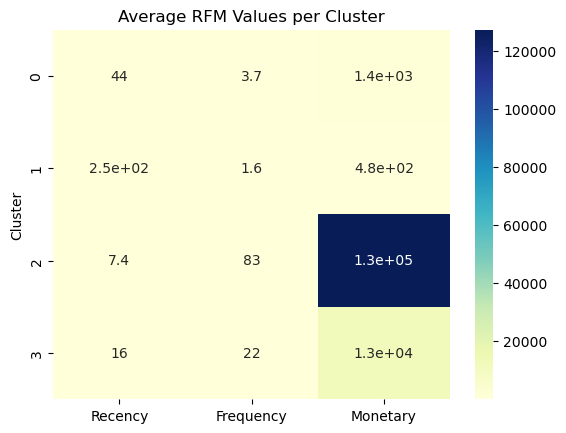

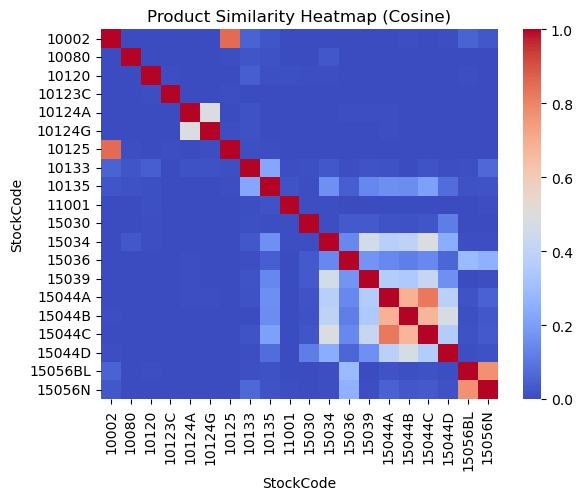

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Analyze Transaction Volume by Country
country_tx = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
country_tx.plot(kind='bar', figsize=(12, 5), title='Number of Transactions by Country')
plt.ylabel("Transactions")
plt.xticks(rotation=90)
plt.show()

# Identify Top-Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Selling Products")
plt.xlabel("Quantity Sold")
plt.show()

#Visualize Purchase Trends Over Time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

monthly_sales.plot(kind='line', figsize=(10, 4), marker='o', title="Monthly Sales Trend")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

#Monetary Distribution Per Transaction & Customer
# 1. Transaction-level
tx_monetary = df.groupby(['InvoiceNo'])['TotalPrice'].sum()

sns.histplot(tx_monetary, bins=50, kde=True)
plt.title("Transaction Monetary Value Distribution")
plt.xlabel("Total Price per Transaction")
plt.show()

# 2. Customer-level
cust_monetary = df.groupby(['CustomerID'])['TotalPrice'].sum()

sns.histplot(cust_monetary, bins=50, kde=True)
plt.title("Customer Monetary Value Distribution")
plt.xlabel("Total Spending per Customer")
plt.show()

#RFM Distributions
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Plot distributions
for col in rfm.columns:
    sns.histplot(rfm[col], bins=50, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.show()

#Elbow Curve for KMeans Cluster Selection
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method For Optimal Clusters")
plt.grid(True)
plt.show()

#Customer Cluster Profiles (after KMeans)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_profile = rfm.groupby('Cluster').mean().round(2)

sns.heatmap(cluster_profile, annot=True, cmap="YlGnBu")
plt.title("Average RFM Values per Cluster")
plt.show()

#Product Recommendation Heatmap / Similarity Matrix
pivot = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(pivot.T)
item_sim_df = pd.DataFrame(item_sim, index=pivot.columns, columns=pivot.columns)

# Plot heatmap (sample 20x20)
sample_codes = item_sim_df.columns[:20]
sns.heatmap(item_sim_df.loc[sample_codes, sample_codes], cmap='coolwarm')
plt.title("Product Similarity Heatmap (Cosine)")
plt.show()


In [9]:
import pandas as pd
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM Table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [11]:
from sklearn.cluster import KMeans

# Try initial KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

rfm['Cluster'] = kmeans.labels_

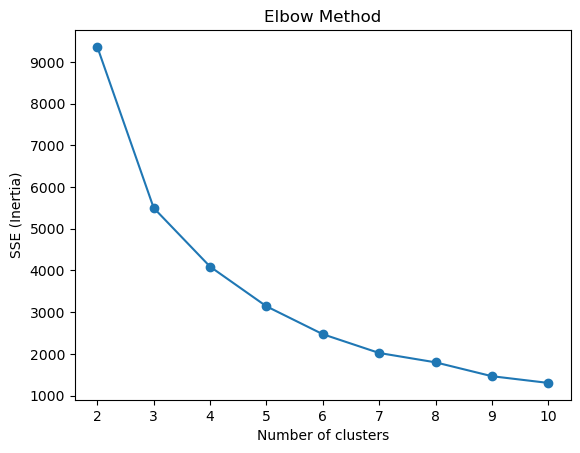

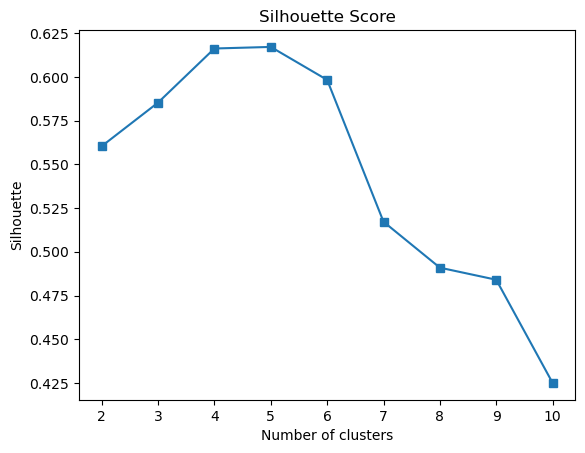

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

sse = []
sil = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)
    sil.append(silhouette_score(rfm_scaled, km.labels_))

# Plot Elbow
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.show()

# Plot Silhouette Score
plt.plot(range(2, 11), sil, marker='s')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [13]:
# Calculate average RFM values by cluster
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

print(cluster_profile)

         Recency  Frequency  Monetary
Cluster                              
0           43.7        3.7    1359.0
1          248.1        1.6     480.6
2            7.4       82.5  127338.3
3           15.5       22.3   12709.1


In [14]:
def label_cluster(row):
    if row['Recency'] <= cluster_profile['Recency'].quantile(0.25) and \
       row['Frequency'] >= cluster_profile['Frequency'].quantile(0.75) and \
       row['Monetary'] >= cluster_profile['Monetary'].quantile(0.75):
        return 'High-Value'
    elif row['Frequency'] >= cluster_profile['Frequency'].median():
        return 'Regular'
    elif row['Recency'] >= cluster_profile['Recency'].quantile(0.75):
        return 'At-Risk'
    else:
        return 'Occasional'

rfm['Segment'] = rfm.apply(label_cluster, axis=1)


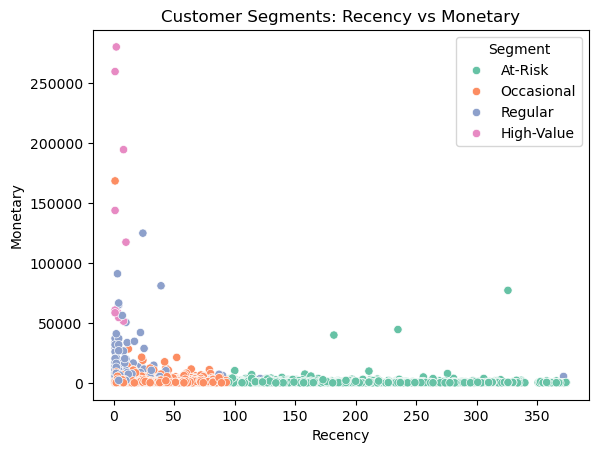

In [15]:
import seaborn as sns

sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title("Customer Segments: Recency vs Monetary")
plt.show()

In [16]:
import joblib

# Save model and scaler
joblib.dump(kmeans, 'rfm_kmeans.pkl')
joblib.dump(scaler, 'rfm_scaler.pkl')

['rfm_scaler.pkl']

In [17]:
item_user_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Transpose
product_similarity = cosine_similarity(item_user_matrix.T)

# Creating similarity DataFrame
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=item_user_matrix.columns,
    columns=item_user_matrix.columns
)

In [20]:
# Create a lookup table for StockCode to Description
product_lookup = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

# Get recommendations with product names
def get_similar_product_names(stock_code, n=5):
    if stock_code not in product_similarity_df.columns:
        return "Product not found."
    
    similar = product_similarity_df[stock_code].sort_values(ascending=False)[1:n+1]
    recommendations = product_lookup.loc[similar.index]
    return recommendations.assign(Similarity=similar.values)

In [21]:
joblib.dump(product_similarity_df, 'product_similarity.pkl')
joblib.dump(product_lookup, 'product_lookup.pkl')

['product_lookup.pkl']